In [37]:
# Imports
import numpy as np 
import networkx as nx
from random import seed
import math
from networkx import karate_club_graph, to_numpy_matrix

In [38]:
def computematrixes (G):
    order = sorted(list(G.nodes()))
    A = nx.to_numpy_matrix(G, nodelist=order)
    I = np.eye(G.number_of_nodes())
    A_own = A + I
    D_own = np.array(np.sum(A_own, axis=0))[0]
    D_inv=D_own**(-.5)
    D_inv = np.matrix(np.diag(D_inv))
    return A_own,D_inv,I

In [39]:
def gcn_layer(A, D, X, W):
    feature=D * A * D * X * W
    feature=1 / (1 + np.exp(-feature))
    return feature

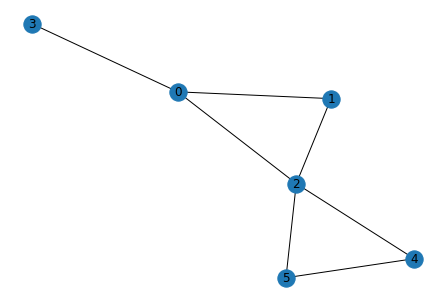

In [40]:
G= nx.Graph()
G.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,4), (2,5), (4,5)])
nx.draw(G, with_labels=True)

In [84]:
seed(1)
W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
seed(1)
W2 = np.random.normal(loc=0, size=(G.number_of_nodes(), 2))

In [85]:
W2

array([[ 0.03503221, -0.75716936],
       [-0.49626827, -1.6050127 ],
       [-1.28556288,  0.52312935],
       [ 0.77064024, -0.15381939],
       [ 0.34996344, -0.55389213],
       [-0.51055306, -0.80791356]])

In [86]:
A_own,D_inv,I= computematrixes (G)
H1 = gcn_layer(A_own, D_inv, I, W1)
spectrum=D_inv * A_own * D_inv
print("Spectrum")
print(spectrum)
print("Identity Matrix")
print(I)
print("weights1")
print(W1)
print("Spectrum * Identity * Weights")
print(spectrum * I * W1)
print("First Layer")
print(H1)

Spectrum
[[0.25       0.28867513 0.2236068  0.35355339 0.         0.        ]
 [0.28867513 0.33333333 0.25819889 0.         0.         0.        ]
 [0.2236068  0.25819889 0.2        0.         0.25819889 0.25819889]
 [0.35355339 0.         0.         0.5        0.         0.        ]
 [0.         0.         0.25819889 0.         0.33333333 0.33333333]
 [0.         0.         0.25819889 0.         0.33333333 0.33333333]]
Identity Matrix
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
weights1
[[ 2.07786243  0.93026003 -0.71996688 -0.28269051]
 [ 1.62896648  2.16257571 -1.1321897   0.45725962]
 [-0.1713859  -0.88456459 -0.5621049   0.58984818]
 [-1.46189167  0.75934379 -1.22048884 -1.25474006]
 [ 1.20333429  0.03770989  0.17461709 -0.73648205]
 [ 1.45848852 -0.23183638 -0.47486232  0.22877852]]
Spectrum * Identity * Weights
[[ 0.43452792  0.92752076 -1.06402518 -0.25039668]
 [ 1.0985644   0.76100792 -0.7303679

In [87]:
#H2 = gcn_layer(A_own, D_inv, H1, W2)
spectrum=D_inv * A_own * D_inv
print("Spectrum")
print(spectrum)
print("First Layer")
print(H1)
print("Spectrum * First Layer")
print(spectrum * H1 )
print("weights2")
print(W2)
print("Second Layer")
print(H2)

Spectrum
[[0.25       0.28867513 0.2236068  0.35355339 0.         0.        ]
 [0.28867513 0.33333333 0.25819889 0.         0.         0.        ]
 [0.2236068  0.25819889 0.2        0.         0.25819889 0.25819889]
 [0.35355339 0.         0.         0.5        0.         0.        ]
 [0.         0.         0.25819889 0.         0.33333333 0.33333333]
 [0.         0.         0.25819889 0.         0.33333333 0.33333333]]
First Layer
[[0.60695437 0.71657203 0.25654099 0.43772586]
 [0.74999102 0.68157252 0.32511399 0.55554784]
 [0.8232064  0.63166142 0.34450918 0.51043187]
 [0.50092237 0.67008477 0.29633931 0.32578394]
 [0.69910143 0.42724451 0.4390012  0.49576601]
 [0.69910143 0.42724451 0.4390012  0.49576601]]
Spectrum * First Layer
[[0.7294197  0.75405058 0.33979393 0.49912237]
 [0.63776062 0.59714165 0.27138022 0.44333613]
 [0.85502168 0.68317205 0.43690946 0.59941916]
 [0.46505196 0.58838886 0.23887059 0.31765143]
 [0.6786186  0.44792395 0.38161936 0.46230362]
 [0.6786186  0.44792395

In [63]:
output = gcn_layer(A_own, D_inv, H1, W2)

ValueError: shapes (6,4) and (6,4) not aligned: 4 (dim 1) != 6 (dim 0)

In [43]:
def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    # Derivative of sigmoid
def sigmoid_derivative(x):
        return (x * (1 - x)) 

In [46]:
target_output = np.ones([W1.shape[0],W2.shape[1]])
print("target output")
print(target_output)
print("Actual output")
print(output)

target output
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Actual output
[[0.8495483  0.43892188]
 [0.78033599 0.46575014]
 [0.85712688 0.44461169]
 [0.81052827 0.43523161]
 [0.80714825 0.4515019 ]
 [0.80714825 0.4515019 ]]


In [52]:
f1=2*(target_output-output)*(-1)
f1

matrix([[-0.3009034 , -1.12215625],
        [-0.43932802, -1.06849973],
        [-0.28574624, -1.11077661],
        [-0.37894346, -1.12953678],
        [-0.38570351, -1.09699621],
        [-0.38570351, -1.09699621]])

In [53]:
s1=sigmoid_derivative(np.array(output))
s1

array([[0.12781599, 0.24626946],
       [0.17141173, 0.24882695],
       [0.12246039, 0.24693214],
       [0.15357219, 0.24580506],
       [0.15565996, 0.24764793],
       [0.15565996, 0.24764793]])

In [55]:
fs1=s1*np.array(f1)
fs1

array([[-0.03846027, -0.27635282],
       [-0.07530598, -0.26587153],
       [-0.0349926 , -0.27428644],
       [-0.05819518, -0.27764585],
       [-0.06003859, -0.27166884],
       [-0.06003859, -0.27166884]])

In [56]:
np.array(H1)

matrix([[0.62968868, 0.34368451, 0.2636739 , 0.66059025],
        [0.43329693, 0.30069268, 0.33928397, 0.67697469],
        [0.55955805, 0.43123877, 0.24032211, 0.65101271],
        [0.7293194 , 0.53490311, 0.40082797, 0.59376795],
        [0.59520769, 0.54821128, 0.25105592, 0.59812555],
        [0.59520769, 0.54821128, 0.25105592, 0.59812555]])

In [93]:
class GCN:
    def __init__(self, G):
        self.G = G
        self.order = sorted(list(self.G.nodes()))
        self.A = nx.to_numpy_matrix(self.G, nodelist=self.order)
        self.I = np.eye(self.G.number_of_nodes())
        self.A_own = self.A + self.I
        self.D_own = np.array(np.sum(self.A_own, axis=0))[0]
        self.weights1= np.random.rand(self.G.number_of_nodes(),4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(self.weights1.shape[1],2)
        self.target_output = np.ones([self.G.number_of_nodes(),self.weights2.shape[1]])
        self.output = np.zeros(self.target_output.shape)
        
    def view(self):
        print("Graph")
        nx.draw(G, with_labels=True)
        print("Weights1:")
        print(self.weights1)
        print("-------------")
        print("Weights2:")
        print(self.weights2)
        print("-------------")
        print("target output")
        print(self.target_output)
        print("Predictive Output")
        print(self.output)
    
    # Activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    # Derivative of sigmoid
    def sigmoid_derivative(self, x):
        return (x * (1 - x))   
    
    def gcn_layer(self, A, D, X, W):
        feature = D * A * D * X * W
        feature = sigmoid(feature)
        return feature
    
    #Feed Forward
    def feedforward(self):
        self.D_inv=self.D_own**(-.5)
        #print("Degree array with -.5")
        #print(D_inv)
        self.D_inv = np.matrix(np.diag(self.D_inv))
        #print("Degree Matrix")
        #print(D_inv)
        #print(D_inv*A_own)
        #print(D_inv*A_own*D_inv)
        self.layer1 = gcn_layer(self.A_own, self.D_inv, self.I, self.weights1)
        print("layer1")
        print(self.layer1)
        print("layer2")
        #print(D_inv*A_own*D_inv*self.layer1*self.weights2)
        self.layer2 = gcn_layer(self.A_own, self.D_inv, self.layer1, self.weights2)
        print(self.layer2)
        return self.layer2
    
          
    def train(self):
            self.output = self.feedforward()

Graph
Weights1:
[[0.6243592  0.28627722 0.45307317 0.60205896]
 [0.98807947 0.8260592  0.36251259 0.52387098]
 [0.70097267 0.17851892 0.3948863  0.16230095]
 [0.68156517 0.12748911 0.93612413 0.46244708]
 [0.14056148 0.12671284 0.54572382 0.38184303]
 [0.42538233 0.88050414 0.91414471 0.15127019]]
-------------
Weights2:
[[0.22578248 0.11410299]
 [0.93984231 0.39576837]
 [0.16611767 0.40290444]
 [0.69530881 0.37038014]]
-------------
target output
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Predictive Output
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
layer1
[[0.69826209 0.59749161 0.65411703 0.6228199 ]
 [0.66609753 0.59966934 0.58748731 0.59636191]
 [0.66397358 0.63947061 0.65719619 0.60825827]
 [0.63680576 0.54114645 0.65209201 0.60923162]
 [0.59137158 0.59431497 0.64303973 0.55468299]
 [0.59137158 0.59431497 0.64303973 0.55468299]]
layer2
[[0.79815724 0.70730471]
 [0.75101128 0.66870834]
 [0.81258259 0.7191452 ]
 [0.73845447 0.66242346]
 [0.75417283 0.67324983

matrix([[0.79815724, 0.70730471],
        [0.75101128, 0.66870834],
        [0.81258259, 0.7191452 ],
        [0.73845447, 0.66242346],
        [0.75417283, 0.67324983],
        [0.75417283, 0.67324983]])

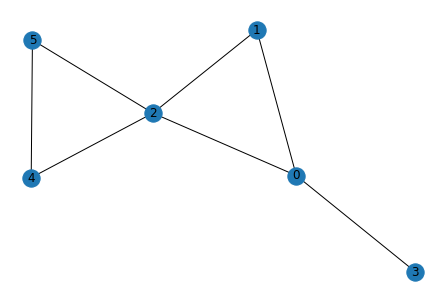

In [94]:
G=nx.Graph()
G.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,4), (2,5), (4,5)])
gcn=GCN(G)
gcn.view()
gcn.feedforward()

In [ ]:
def backprop():
        d_weights2 = np.dot(self.layer1.T, 2*(self.target_output -self.output)*self.sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.I.T, np.dot(2*(self.target_output - self.output)*
                     self.sigmoid_derivative(self.output), self.weights2.T)*self.sigmoid_derivative(self.layer1))
        self.weights1 -= d_weights1
        self.weights2 -= d_weights2

Graph
Weights1:
[[0.2056325  0.52736066 0.42337981 0.41808659]
 [0.51052288 0.84572054 0.11375491 0.32513274]
 [0.29021085 0.4140406  0.60453683 0.70635182]
 [0.43751609 0.78603429 0.62500784 0.07286674]
 [0.55398168 0.19170779 0.64624455 0.84883634]
 [0.26195637 0.8542823  0.52994229 0.33627596]]
-------------
Weights2:
[[0.93319022 0.06723011]
 [0.57009908 0.08661455]
 [0.35294402 0.28832273]
 [0.87229082 0.47913678]]
-------------
target output
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Predictive Output
[[0.86334933 0.65023298]
 [0.81434939 0.62213239]
 [0.88202497 0.66524435]
 [0.80102035 0.6142847 ]
 [0.8275001  0.63209567]
 [0.8275001  0.63209567]]


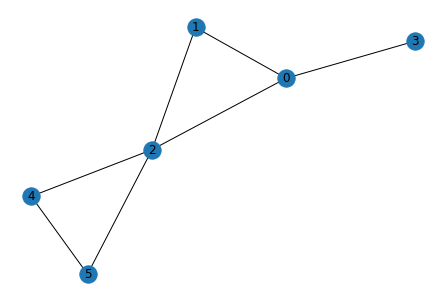

In [ ]:
class GCN:
    def __init__(self, G):
        self.G = G
        self.weights1= np.random.rand(self.G.number_of_nodes(),4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(self.weights1.shape[1],1)
        self.y = np.eye(G.number_of_nodes())
        self.output = np.zeros(y.shape)
    # Activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    # Derivative of sigmoid
    def sigmoid_derivative(self, x):
        return (x * (1 - x))  
    #Feed Forward
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = self.sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
    #Backpropagation 
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*self.sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*
                     self.sigmoid_derivative(self.output), self.weights2.T)*self.sigmoid_derivative(self.layer1))
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    #Train
    def classfication(self):
        fo=np.zeros(self.output.shape)
        j=0
        for i in self.output:
            if i>=0.5:
                fo[j]=1
            else:
                fo[j]=0
            j=j+1
        return fo
    def train(self):
        for i in range(100000):
            self.output = self.feedforward()
            self.backprop()
        finaloutput=self.classfication()
        #for i in finaloutput:
        print("Weights1:")
        print(self.weights1)
        print("-------------")
        print("Weights2:")
        print(self.weights2)
        print("-------------")
        print("Predictive Output:")
        print(self.output.T)
        print("Predictive Output class:")
        print(finaloutput.T)
        print("Actual Output:")
        print(self.y.T)

In [8]:
feature_representations = {
    node: np.array(output)[node] 
    for node in G.nodes()}

In [9]:
feature_representations

{0: array([0.09430695, 0.61631001]),
 1: array([0.15908647, 0.59771895]),
 2: array([0.0931612 , 0.64199248]),
 3: array([0.1331321 , 0.58417354]),
 4: array([0.14434383, 0.61775827]),
 5: array([0.14434383, 0.61775827])}

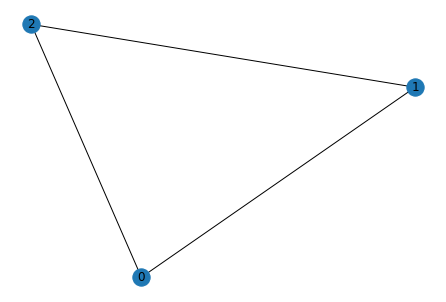

In [10]:
test= nx.Graph()
test.add_edges_from([(0,1), (0,2), (1,2)])
nx.draw(test, with_labels=True)

In [11]:
test_A_own,test_D_inv,test_I= computematrixes (test)
test_order = sorted(list(test.nodes()))
test_W1=np.empty((len(test_order),W1.shape[1]))
for i in range(len(test_order)):
    for j in range(W1.shape[1]):
        test_W1[i][j]=W1[test_order[i]][j]
test_H1= gcn_layer(test_A_own, test_D_inv, test_I, test_W1)
test_W2=W2
test_H2 = gcn_layer(test_A_own, test_D_inv, test_H1, test_W2)

In [12]:
similarity_matrix=test_H2*H2.T
similarity_matrix

matrix([[0.38995338, 0.3884758 , 0.40543127, 0.376273  , 0.39844644,
         0.39844644],
        [0.38995338, 0.3884758 , 0.40543127, 0.376273  , 0.39844644,
         0.39844644],
        [0.38995338, 0.3884758 , 0.40543127, 0.376273  , 0.39844644,
         0.39844644]])

In [13]:
def maxelement(arr,p): 
    # get number of rows and columns 
    no_of_rows = len(arr) 
    no_of_column = len(arr[0]) 
    for i in range(no_of_rows):   
        # Initialize max1 to 0 at beginning 
        # of finding max element of each row 
        max1 = 0
        for j in range(no_of_column): 
            if arr[i][j] > max1 : 
                max1 = arr[i][j]
                p[i]=j
            #print(max1)
            #print(predicted_node[i])
    return p
actual_node = np.array(sorted(list(test.nodes())))
print("Actual Nodes: ")
print(actual_node)
predicted_node=np.zeros(len(actual_node))
predicted_node=maxelement(np.array(similarity_matrix),predicted_node)
print("Predicted Nodes: ")
print(predicted_node)

Actual Nodes: 
[0 1 2]
Predicted Nodes: 
[2. 2. 2.]
